In [1]:
#Step 1: Import Packages
import os
import pandas as pd
import glob


#Step 2: Create a base path variable and a file number variable to read in different files
core_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_data/'
files = glob.glob(f"{core_path}/*.csv")

#Step 3: Create a data frame to store the end product
sub_summary = pd.DataFrame(columns=['sub', 'condition', 'acc', 'filtered_acc', 'no_responses','num_trials'])


#Step 4: Run each file through the loop, check for error warnings
#Step 4(A): Adds the the file into the loop and reads it into a data fram
for file in files:
    print(f"\nProcessing file: {file}")
    try:
        data = pd.read_csv(file)
    except Exception as e:
        print(f"Failed to read {file}: {e}")
        continue

    if 'participant' not in data.columns:
        print(f"Error detected, 'participant' column missing in {file}")
        continue

    sub = data.loc[0, 'participant'] #participant number

    #Step 4(B): Create Temporary data frame "condition_summary"
    condition_summary = pd.DataFrame(columns=sub_summary.columns) 

    #Step 4(C): Create inner loop to cycle through each condition
    for condition in ['natural', 'scrambled', 'line_drawing']:
        if 'img_condition' not in data.columns or 'key_resp.corr' not in data.columns or 'response_label' not in data.columns:
            print(f"Missing expected columns in {file}")
            continue
        
        #Step 4(D): filter the trials by condition and calculate variables of interest
        trials = data[data['img_condition'] == condition] 
        filtered_trials = trials[trials['response_label'] != 'no response'] #filtered for no responses 
        acc = trials['key_resp.corr'].mean() #Mean accuracy
        filtered_acc = filtered_trials['key_resp.corr'].mean() #mean accuracy

        no_resp = (trials['response_label'] == 'no response').sum() #number of no responses
        num_trials = (filtered_trials['img_condition'] == condition).sum() #number of trials


        #Step 4(E): Add all the newly created variables to data frame "row"
        row = {
            'sub': sub,
            'condition': condition,
            'acc': acc,
            'filtered_acc': filtered_acc,
            'no_responses': no_resp,
            'num_trials': num_trials,
        }

        print(f"  {condition} = acc: {acc:.3f}, no_responses: {no_resp}")
        #Step 5(F): Add another row to the data frame "condition_summary"
        condition_summary = pd.concat([condition_summary, pd.DataFrame([row])], ignore_index=True)

        #Step 4(G): Combine the data frames
    sub_summary = pd.concat([sub_summary, condition_summary], ignore_index=True)

print("\nFinal sub_summary:")
print(sub_summary)

#Step 5: Save the newly compiled data frame as a csv file
sub_summary.to_csv('glint_data.csv', index=False)


Processing file: /zpool/vladlab/active_drive/arsch/GLINT/glint_data/s4.csv
  natural = acc: 0.958, no_responses: 2
  scrambled = acc: 0.764, no_responses: 4
  line_drawing = acc: 0.875, no_responses: 2

Processing file: /zpool/vladlab/active_drive/arsch/GLINT/glint_data/s3.csv
  natural = acc: 1.000, no_responses: 0
  scrambled = acc: 0.917, no_responses: 2
  line_drawing = acc: 0.958, no_responses: 0

Processing file: /zpool/vladlab/active_drive/arsch/GLINT/glint_data/glint_subj_data.csv
Error detected, 'participant' column missing in /zpool/vladlab/active_drive/arsch/GLINT/glint_data/glint_subj_data.csv

Processing file: /zpool/vladlab/active_drive/arsch/GLINT/glint_data/s2.csv
  natural = acc: 0.972, no_responses: 0
  scrambled = acc: 0.944, no_responses: 0
  line_drawing = acc: 0.764, no_responses: 3

Processing file: /zpool/vladlab/active_drive/arsch/GLINT/glint_data/s5.csv
  natural = acc: 0.986, no_responses: 1
  scrambled = acc: 0.889, no_responses: 0
  line_drawing = acc: 0.8

In [2]:
accs = data.groupby('img_condition')['key_resp.corr'].mean()
print("\nOverall accuracies by condition:")
print(accs)


Overall accuracies by condition:
img_condition
line_drawing    0.875000
natural         0.986111
scrambled       0.875000
Name: key_resp.corr, dtype: float64


Figures

Text(0.5, 1.0, 'Accuracy Across Condtions (No Responses Included)')

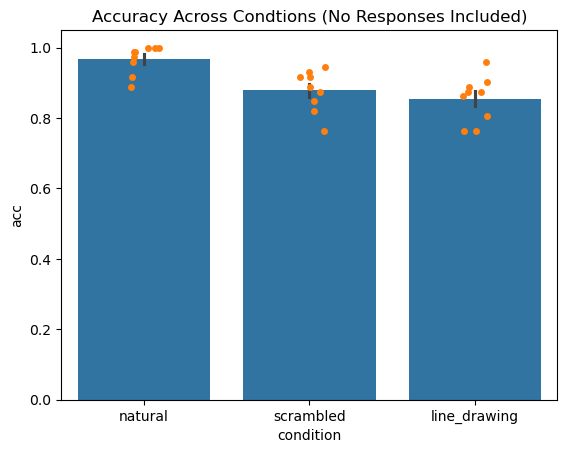

In [18]:
import seaborn as sns

acc_across_conditions = sns.barplot(sub_summary,x='condition',y='acc', errorbar='se')
sns.stripplot(sub_summary,x='condition',y='acc') 
acc_across_conditions.set_title('Accuracy Across Condtions (No Responses Included)')





Text(0.5, 1.0, 'Accuracy Across Condtions (No Responses removed)')

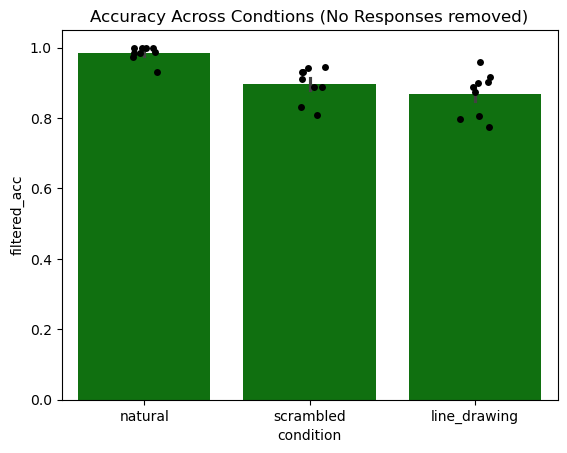

In [21]:
filtered_acc = sns.barplot(sub_summary,x='condition',y='filtered_acc', errorbar='se', color='green')
sns.stripplot(sub_summary,x='condition',y='filtered_acc',color = 'black')
filtered_acc.set_title('Accuracy Across Condtions (No Responses removed)')